# Final Project Submission

Please fill out:
* Student name: MARYANN WAITHIRA MAINA
* Student pace: FULL TIME
* Scheduled project review date/time: 
* Instructor name: MARK TIBA
* Blog post URL:  


# MICROSOFT MOVIE DATA ANALYSIS PROJECT





# Project Overview

Our client, Microsoft, is planning to open a new Movie Studio. The goal of this project is to define what factors to look at for a successful movie production then translate those findings in to actionable insights that the head of Microsoft’s new movie studio can use to help decide what type of films to create. 





# Business Problem

Microsoft is launching a movie studio that can compete with other successful movie studios. However, they don’t know anything about creating movies.  In order to be successful from the start, I will have to consider the following questions: 

1. What genres have the highest ratings? 

2. What genres have the highest grossings?

3. Which is the most successful movie studio with a high number of gross? 
 
4. What genre is popular in the box office? 

5. Who are the top directors from the standpoint of movies profitability? 

6. Who are the top screen writers from the standpoint of movies profitability? 

7. Correlation between production budgets vs profits vs movie?  

I assume that the answers to these questions are one of the main parts of the steps that should be taken into account to create the most cost-effective film in the digital world. 

# Data Understanding



It involves using things like budget, income, popularity, profit, timing, rating, popularity, genres, ratings, directors and script/screen writers. This project analyzes data from IMDB, Rotten Tomatoes, The Movie DB and Box Office Mojo, pulling data from over 2,000 movies over the past years.

In [101]:
# Importing necessary libraries for my analysis
import pandas as pd
import csv
import sqlite3



# Data Visualization packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [102]:
#Importing modules and packges from inside zip files
import zippedData

In [103]:
# Listing the files in the zippedData
! ls

bom.movie_gross.csv
bom.movie_gross.csv.gz
im.db
im.db.zip
rt.movie_info.tsv
rt.movie_info.tsv.gz
rt.reviews.tsv
rt.reviews.tsv.gz
tmdb.movies.csv
tmdb.movies.csv.gz
tn.movie_budgets.csv
tn.movie_budgets.csv.gz


Now that I have a list of what datasets I will be working with, lets understand what their data represents.

In [104]:
# Use pandas to load the csv file
bommo_df = pd.read_csv("bom.movie_gross.csv") 
# get info for DataFrame
bommo_df.info()
# checking the first entries
bommo_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [105]:
# Use pandas to load the tsv file
rtmo_df = pd.read_table("rt.movie_info.tsv") 
# get info for DataFrame
rtmo_df.info()
# checking the first entries
rtmo_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [106]:
# Use pandas to load the csv file
tmdb_df = pd.read_csv("tmdb.movies.csv") 
# get info for DataFrame
tmdb_df.info()
# checking the first entries
tmdb_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [107]:
# Use pandas to load the csv file
tnmo_df = pd.read_csv("tn.movie_budgets.csv") 
# get info for DataFrame
tnmo_df.info()
# checking the first entries
tnmo_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [108]:
# Use pandas to load the tsv file
rt_reviews = pd.read_table('rt.reviews.tsv', encoding='unicode_escape') 
# get info from the table
rt_reviews.info()
## checking the first entries
rt_reviews.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [109]:
conn = sqlite3.connect('im.db')

In [110]:
movie_basics_df = pd.read_sql_query("""
SELECT *
FROM movie_basics
LIMIT 10
;""", conn)

movie_basics_df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy
6,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller"
7,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy"
8,tt0139613,O Silêncio,O Silêncio,2012,NaN,"Documentary,History"
9,tt0144449,Nema aviona za Zagreb,Nema aviona za Zagreb,2012,82.0,Biography


In [111]:
movie_basics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         10 non-null     object 
 1   primary_title    10 non-null     object 
 2   original_title   10 non-null     object 
 3   start_year       10 non-null     int64  
 4   runtime_minutes  7 non-null      float64
 5   genres           10 non-null     object 
dtypes: float64(1), int64(1), object(4)
memory usage: 608.0+ bytes


In [112]:
movie_ratings_df = pd.read_sql_query("""
SELECT *
FROM movie_ratings
LIMIT 10
;""", conn)

movie_ratings_df

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
5,tt1069246,6.2,326
6,tt1094666,7.0,1613
7,tt1130982,6.4,571
8,tt1156528,7.2,265
9,tt1161457,4.2,148


In [113]:
movie_ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       10 non-null     object 
 1   averagerating  10 non-null     float64
 2   numvotes       10 non-null     int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 368.0+ bytes


# Data Preparation

Here, I will ensure that raw data being readied for processing and analysis is accurate and consistent so the results will be valid. Mostly this data is commonly created with missing values, inaccurcies, or other errors and separate data sets often have different formats that need to be reconciled when they are combined. 

## (1A). Data Cleaning
Now that we have a view of how the data sets look like, i shall begin to detect, correct corrupt records, identitfy incomplete or irrevelant parts of the data within those different datasets then replace, modify or delete the coarse data.

In [114]:
# lets have a look again on how the dataset looks like
bommo_df = pd.read_csv("bom.movie_gross.csv") 
# get info for DataFrame
bommo_df.info()
# checking the first entries
bommo_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [115]:
#Remove object data type in the foreign_gross column
bommo_df['foreign_gross'] = [float(str(i).replace(",", "")) for i in bommo_df["foreign_gross"]]

In [116]:
#transfigure foreign_gross into float64
bommo_df['foreign_gross'] = bommo_df['foreign_gross'].astype('float64')

In [117]:
#Get new info of the dataframes
bommo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   float64
 4   year            3387 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 132.4+ KB


In [118]:
# Check missing values
bommo_df.isnull().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [119]:
#lets have a look on how big the missing values are in form of percentage
bommo_df.isnull().sum()*100/len(bommo_df)

title              0.000000
studio             0.147623
domestic_gross     0.826690
foreign_gross     39.858282
year               0.000000
dtype: float64

In [120]:
# since the percentage isnt to high as we had thought, then it means we can work with what we got.
# drop the missing values
bommo_df.dropna(axis=0, inplace=True)
#counter check if the missing values dropped
bommo_df.isnull().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

In [121]:
# run new dataframe
bommo_df

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010
...,...,...,...,...,...
3275,I Still See You,LGF,1400.0,1500000.0,2018
3286,The Catcher Was a Spy,IFC,725000.0,229000.0,2018
3309,Time Freak,Grindstone,10000.0,256000.0,2018
3342,Reign of Judges: Title of Liberty - Concept Short,Darin Southa,93200.0,5200.0,2018


In [122]:
# Inorder to avoid contamination within the data, lets check if there are any duplicates.
bommo_df.duplicated().any()

False

In [123]:
# lets have a look again on how the dataset looks like
rtmo_df = pd.read_table("rt.movie_info.tsv") 
# get info for DataFrame
rtmo_df.info()
# checking the first entries
rtmo_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [124]:
# drop the columns that i wont be working with
rtmo_df.drop(['synopsis','theater_date','dvd_date','currency'], axis = 1, inplace = True)

In [125]:
# run the new dataframe
rtmo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          1560 non-null   int64 
 1   rating      1557 non-null   object
 2   genre       1552 non-null   object
 3   director    1361 non-null   object
 4   writer      1111 non-null   object
 5   box_office  340 non-null    object
 6   runtime     1530 non-null   object
 7   studio      494 non-null    object
dtypes: int64(1), object(7)
memory usage: 97.6+ KB


In [126]:
# Check missing values
rtmo_df.isnull().sum()

id               0
rating           3
genre            8
director       199
writer         449
box_office    1220
runtime         30
studio        1066
dtype: int64

In [127]:
#lets have a look on how big the missing values are in form of percentage
rtmo_df.isnull().sum()*100/len(bommo_df)

id             0.000000
rating         0.149477
genre          0.398605
director       9.915296
writer        22.371699
box_office    60.787245
runtime        1.494768
studio        53.114101
dtype: float64

In [128]:
# Since the studio info is important, will just fill it with unkown
rtmo_df['studio'].fillna("Unknown", inplace = True)

In [129]:
# Since the box_office info is important, will just fill it with unkown
rtmo_df['box_office'].fillna("0", inplace = True)

In [130]:
# replace the unkown to 0
rtmo_df['box_office'] = rtmo_df['box_office'].str.replace('Unknown', '0')

In [131]:
# remove the commas
rtmo_df['box_office'] = rtmo_df['box_office'].str.replace(',', '')

In [132]:
# changing the data type to int64
rtmo_df['box_office']= rtmo_df['box_office'].astype('int64')

In [133]:
# run new dataframe
rtmo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          1560 non-null   int64 
 1   rating      1557 non-null   object
 2   genre       1552 non-null   object
 3   director    1361 non-null   object
 4   writer      1111 non-null   object
 5   box_office  1560 non-null   int64 
 6   runtime     1530 non-null   object
 7   studio      1560 non-null   object
dtypes: int64(2), object(6)
memory usage: 97.6+ KB


In [134]:
# lets have a look at our new dataframe
rtmo_df

,id,rating,genre,director,writer,box_office,runtime,studio
0,1,R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,0,104 minutes,Unknown
1,3,R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,600000,108 minutes,Entertainment One
2,5,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,0,116 minutes,Unknown
3,6,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,0,128 minutes,Unknown
4,7,NR,Drama|Romance,Rodney Bennett,Giles Cooper,0,200 minutes,Unknown
...,...,...,...,...,...,...,...,...
1555,1996,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,33886034,106 minutes,New Line Cinema
1556,1997,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,0,88 minutes,Paramount Vantage
1557,1998,G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,0,111 minutes,Unknown
1558,1999,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,0,101 minutes,Unknown


In [135]:
# Inorder to avoid contamination within the data, lets check if there are any duplicates.
rtmo_df.duplicated().any()

False

## (1B) Merging of data

In [136]:
# put together the combination of bommo_df with rtmo_df to make one dataframe
film1 = pd.merge(rtmo_df,bommo_df, how ='inner',left_on = 'studio',right_on = 'studio')
film1

,id,rating,genre,director,writer,box_office,runtime,studio,title,domestic_gross,foreign_gross,year
0,26,R,Art House and International|Comedy|Drama|Music...,Jim Jarmusch,Jim Jarmusch,1971135,96 minutes,MGM,Hot Tub Time Machine,50300000.0,14300000.0,2010
1,26,R,Art House and International|Comedy|Drama|Music...,Jim Jarmusch,Jim Jarmusch,1971135,96 minutes,MGM,Creed II,115700000.0,98300000.0,2018
2,346,PG-13,Drama|Romance,Joan Chen,Allison Burnett,0,103 minutes,MGM,Hot Tub Time Machine,50300000.0,14300000.0,2010
3,346,PG-13,Drama|Romance,Joan Chen,Allison Burnett,0,103 minutes,MGM,Creed II,115700000.0,98300000.0,2018
4,359,PG,Action and Adventure|Drama,Sylvester Stallone,Sylvester Stallone,0,99 minutes,MGM,Hot Tub Time Machine,50300000.0,14300000.0,2010
...,...,...,...,...,...,...,...,...,...,...,...,...
360,1399,R,Drama|Horror,Trey Edward Shults,Trey Edward Shults,13985117,91 minutes,A24,Lady Bird,49000000.0,30000000.0,2017
361,1399,R,Drama|Horror,Trey Edward Shults,Trey Edward Shults,13985117,91 minutes,A24,The Disaster Artist,21100000.0,8700000.0,2017
362,1399,R,Drama|Horror,Trey Edward Shults,Trey Edward Shults,13985117,91 minutes,A24,It Comes At Night,14000000.0,5300000.0,2017
363,1399,R,Drama|Horror,Trey Edward Shults,Trey Edward Shults,13985117,91 minutes,A24,Hereditary,44100000.0,35300000.0,2018


In [137]:
# replace data type to int64
film1['foreign_gross'] = [float(str(i).replace(",", "")) for i in film1["foreign_gross"]]

In [138]:
film1['foreign_gross'] = film1['foreign_gross'].astype('int64')

In [139]:
# replace data type to int64
film1['domestic_gross'] = [float(str(i).replace(",", "")) for i in film1["domestic_gross"]]

In [140]:
film1['domestic_gross'] = film1['domestic_gross'].astype('int64')

In [141]:
film1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 364
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              365 non-null    int64 
 1   rating          365 non-null    object
 2   genre           365 non-null    object
 3   director        365 non-null    object
 4   writer          365 non-null    object
 5   box_office      365 non-null    int64 
 6   runtime         365 non-null    object
 7   studio          365 non-null    object
 8   title           365 non-null    object
 9   domestic_gross  365 non-null    int64 
 10  foreign_gross   365 non-null    int64 
 11  year            365 non-null    int64 
dtypes: int64(5), object(7)
memory usage: 37.1+ KB


In [142]:
# Inorder to avoid contamination within the data, lets check if there are any duplicates.
film1.duplicated().any()

False

I have merged the first data which consists of (bommo_df and rtmo_df) and named it film1. Now lets merge another data which is (movie_ratings_df and movie_basics_df) and name it film2.

In [143]:
# setting the index
movie_ratings_df.set_index('movie_id')

,averagerating,numvotes
movie_id,,
tt10356526,8.3,31
tt10384606,8.9,559
tt1042974,6.4,20
tt1043726,4.2,50352
tt1060240,6.5,21
tt1069246,6.2,326
tt1094666,7.0,1613
tt1130982,6.4,571
tt1156528,7.2,265


In [144]:
# setting the index
movie_basics_df.set_index('movie_id')

,primary_title,original_title,start_year,runtime_minutes,genres
movie_id,,,,,
tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy
tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller"
tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy"
tt0139613,O Silêncio,O Silêncio,2012,NaN,"Documentary,History"


In [145]:
film2 = pd.merge(movie_basics_df, movie_ratings_df, how ='outer')
film2

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013.0,175.0,"Action,Crime,Drama",NaN,NaN
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019.0,114.0,"Biography,Drama",NaN,NaN
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018.0,122.0,Drama,NaN,NaN
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018.0,NaN,"Comedy,Drama",NaN,NaN
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017.0,80.0,"Comedy,Drama,Fantasy",NaN,NaN
5,tt0111414,A Thin Life,A Thin Life,2018.0,75.0,Comedy,NaN,NaN
6,tt0112502,Bigfoot,Bigfoot,2017.0,NaN,"Horror,Thriller",NaN,NaN
7,tt0137204,Joe Finds Grace,Joe Finds Grace,2017.0,83.0,"Adventure,Animation,Comedy",NaN,NaN
8,tt0139613,O Silêncio,O Silêncio,2012.0,NaN,"Documentary,History",NaN,NaN
9,tt0144449,Nema aviona za Zagreb,Nema aviona za Zagreb,2012.0,82.0,Biography,NaN,NaN


In [146]:
film2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 0 to 19
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         20 non-null     object 
 1   primary_title    10 non-null     object 
 2   original_title   10 non-null     object 
 3   start_year       10 non-null     float64
 4   runtime_minutes  7 non-null      float64
 5   genres           10 non-null     object 
 6   averagerating    10 non-null     float64
 7   numvotes         10 non-null     float64
dtypes: float64(4), object(4)
memory usage: 1.4+ KB


In [147]:
# change the NaN to 0
film2.fillna(0, inplace = True)

In [148]:
#lets have a look at the new data
film2

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013.0,175.0,"Action,Crime,Drama",0.0,0.0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019.0,114.0,"Biography,Drama",0.0,0.0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018.0,122.0,Drama,0.0,0.0
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018.0,0.0,"Comedy,Drama",0.0,0.0
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017.0,80.0,"Comedy,Drama,Fantasy",0.0,0.0
5,tt0111414,A Thin Life,A Thin Life,2018.0,75.0,Comedy,0.0,0.0
6,tt0112502,Bigfoot,Bigfoot,2017.0,0.0,"Horror,Thriller",0.0,0.0
7,tt0137204,Joe Finds Grace,Joe Finds Grace,2017.0,83.0,"Adventure,Animation,Comedy",0.0,0.0
8,tt0139613,O Silêncio,O Silêncio,2012.0,0.0,"Documentary,History",0.0,0.0
9,tt0144449,Nema aviona za Zagreb,Nema aviona za Zagreb,2012.0,82.0,Biography,0.0,0.0


In [149]:
# change all columns with float64 to int64
# (1st column is runtime_minutes)
film2['runtime_minutes']= film2['runtime_minutes'].astype('float64')

In [150]:
# (2nd column is start_year)
film2['start_year']= film2['start_year'].astype('int64')

In [151]:
# (3rd column is averagerating)
film2['averagerating']= film2['averagerating'].astype('float64')

In [152]:
# (4th column is numvotes)
film2['numvotes']= film2['numvotes'].astype('int64')

In [153]:
# lets have a look at the new dataframe
film2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 0 to 19
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         20 non-null     object 
 1   primary_title    20 non-null     object 
 2   original_title   20 non-null     object 
 3   start_year       20 non-null     int64  
 4   runtime_minutes  20 non-null     float64
 5   genres           20 non-null     object 
 6   averagerating    20 non-null     float64
 7   numvotes         20 non-null     int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 1.4+ KB


In [154]:
# Inorder to avoid contamination within the data, lets check if there are any duplicates.
film2.duplicated().any()

False

In [155]:
# lets have a look again on how the dataset looks like
tnmo = pd.read_csv("tn.movie_budgets.csv") 
# get info for DataFrame
tnmo.info()
# checking the first entries
tnmo.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [156]:
# lets remove the commas
tnmo_df['worldwide_gross'] = tnmo_df['worldwide_gross'].str.replace(',' , '')

In [157]:
# lets remove the $
tnmo_df['worldwide_gross'] = tnmo_df['worldwide_gross'].str.replace('$' , '')

In [158]:
# lets change data type to int64
tnmo_df['worldwide_gross'] = tnmo_df['worldwide_gross'].astype('int64')

In [159]:
# lets remove the commas
tnmo_df['production_budget'] = tnmo_df['production_budget'].str.replace(',' , '')

In [160]:
# lets remove the $
tnmo_df['production_budget'] = tnmo_df['production_budget'].str.replace('$' , '')

In [161]:
# lets change data type to int64
tnmo_df['production_budget'] = tnmo_df['production_budget'].astype('int64')

In [162]:
# lets remove the commas
tnmo_df['domestic_gross'] = tnmo_df['domestic_gross'].str.replace(',' , '')

In [163]:
# lets remove the $
tnmo_df['domestic_gross'] = tnmo_df['domestic_gross'].str.replace('$' , '')

In [164]:
# lets change data type to int64
tnmo_df['domestic_gross'] = tnmo_df['domestic_gross'].astype('int64')

In [165]:
# run the new dataframe
tnmo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   int64 
 4   domestic_gross     5782 non-null   int64 
 5   worldwide_gross    5782 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 271.2+ KB


In [166]:
tnmo_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,0
5778,79,"Apr 2, 1999",Following,6000,48482,240495
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0


Now that we have two merged data, and the tnmo_df, I can move on to analysis to present further understanding of the three datas.

#  Exploratory Data Analysis

After polishing our data, I shall now move on to drawing conclusions using statistics. This means use of statistical and graphic tecniques to present information about the data set.

Lets plot some graphs with the first merged table called film1:-


In [167]:
# Data Visualization packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [168]:
# lets get a view of what i am working with
film1.columns

Index(['id', 'rating', 'genre', 'director', 'writer', 'box_office', 'runtime',
       'studio', 'title', 'domestic_gross', 'foreign_gross', 'year'],
      dtype='object')

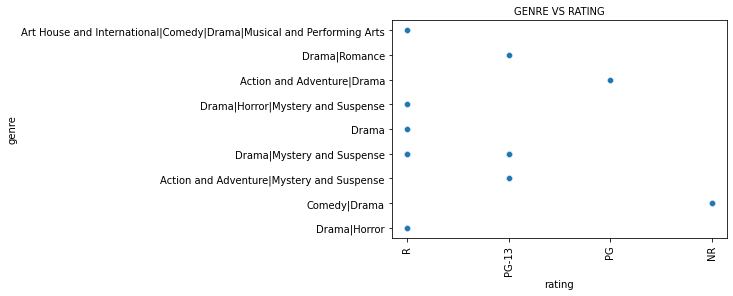

In [169]:
# correlation between genre and rating?
sns.scatterplot(x = 'rating', y = 'genre', data = film1)
plt.title('GENRE VS RATING', fontsize = 10)
plt.xlabel('rating', fontsize = 10)
plt.ylabel('genre', fontsize = 10)
plt.xticks(rotation=90);
plt.show()

Most movies are rated R while least are NR. 
If most movies are rated R then this means that the audience is most probably aged 2 - 12 years.
It could also conclude that as a movie studio, it can draw a line on which kind of movies to produce most to target 
a certain audience.


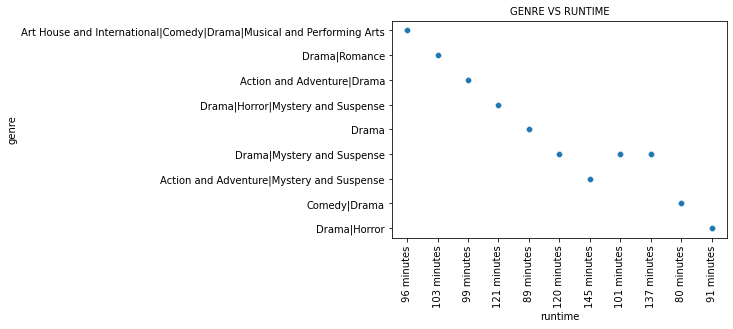

In [170]:
# correlation between genre and running time
sns.scatterplot(x = 'runtime', y = 'genre', data = film1)
plt.title('GENRE VS RUNTIME', fontsize = 10)
plt.xlabel('runtime', fontsize = 10)
plt.ylabel('genre', fontsize = 10)
plt.xticks(rotation=90);
plt.show()

You will notice that different genres have different running times. 
With this, a movie studio can have a rough idea of how long a movie should prolong.

In [171]:
# want to get the total gross
film1['total_gross' ]  = film1[ 'domestic_gross'] + film1['foreign_gross']
film1

,id,rating,genre,director,writer,box_office,runtime,studio,title,domestic_gross,foreign_gross,year,total_gross
0,26,R,Art House and International|Comedy|Drama|Music...,Jim Jarmusch,Jim Jarmusch,1971135,96 minutes,MGM,Hot Tub Time Machine,50300000,14300000,2010,64600000
1,26,R,Art House and International|Comedy|Drama|Music...,Jim Jarmusch,Jim Jarmusch,1971135,96 minutes,MGM,Creed II,115700000,98300000,2018,214000000
2,346,PG-13,Drama|Romance,Joan Chen,Allison Burnett,0,103 minutes,MGM,Hot Tub Time Machine,50300000,14300000,2010,64600000
3,346,PG-13,Drama|Romance,Joan Chen,Allison Burnett,0,103 minutes,MGM,Creed II,115700000,98300000,2018,214000000
4,359,PG,Action and Adventure|Drama,Sylvester Stallone,Sylvester Stallone,0,99 minutes,MGM,Hot Tub Time Machine,50300000,14300000,2010,64600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,1399,R,Drama|Horror,Trey Edward Shults,Trey Edward Shults,13985117,91 minutes,A24,Lady Bird,49000000,30000000,2017,79000000
361,1399,R,Drama|Horror,Trey Edward Shults,Trey Edward Shults,13985117,91 minutes,A24,The Disaster Artist,21100000,8700000,2017,29800000
362,1399,R,Drama|Horror,Trey Edward Shults,Trey Edward Shults,13985117,91 minutes,A24,It Comes At Night,14000000,5300000,2017,19300000
363,1399,R,Drama|Horror,Trey Edward Shults,Trey Edward Shults,13985117,91 minutes,A24,Hereditary,44100000,35300000,2018,79400000


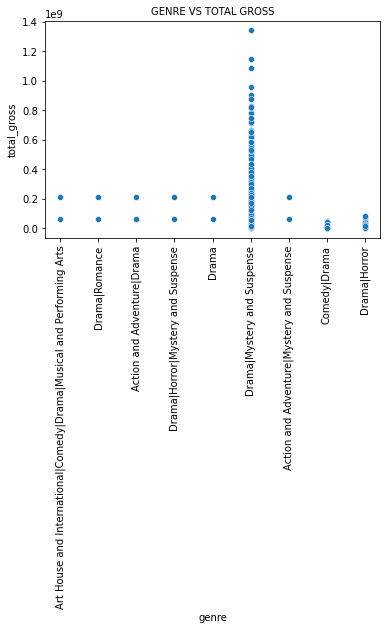

In [172]:
# which genre had the highest total gross?
sns.scatterplot(x = 'genre', y = 'total_gross', data = film1)
plt.title('GENRE VS TOTAL GROSS', fontsize = 10)
plt.xlabel('genre', fontsize = 10)
plt.ylabel('total_gross', fontsize = 10)
plt.xticks(rotation=90);
plt.show()

Drama|Mystery and Suspense made the highest total gross.
This enlightens a movie studio on the kind of movie genre they should invest in to bring income to the movie studio.

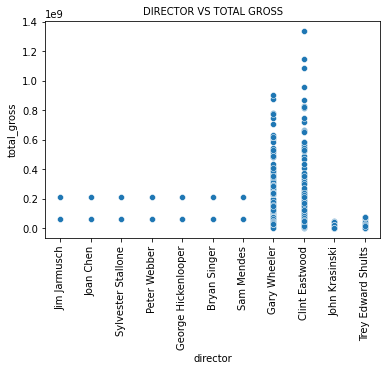

In [173]:
# which director produced the most grossing movies?
sns.scatterplot(x = 'director', y = 'total_gross', data = film1)
plt.title('DIRECTOR VS TOTAL GROSS', fontsize = 10)
plt.xlabel('director', fontsize = 10)
plt.ylabel('total_gross', fontsize = 10)
plt.xticks(rotation=90);
plt.show()

We notice that Clint Eastwood has the highest number of total gross income meaning his films are 
selling and are loved and followed up by a big audience.
This means that the Movie Studio can hire Clint Eastwood as thier director with assuarnce 
that he will bring benefits to the new company.

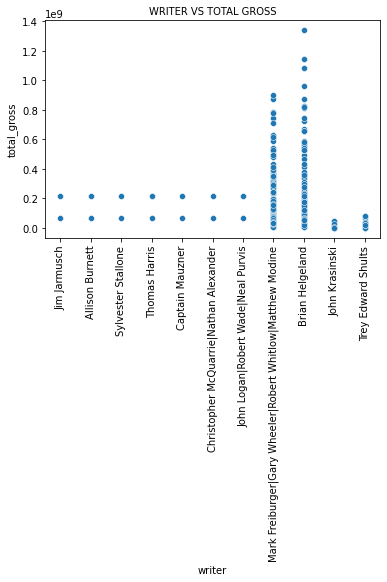

In [174]:
# which writer wrote the most grossing movies?
sns.scatterplot(x = 'writer', y = 'total_gross', data = film1)
plt.title('WRITER VS TOTAL GROSS', fontsize = 10)
plt.xlabel('writer', fontsize = 10)
plt.ylabel('total_gross', fontsize = 10)
plt.xticks(rotation=90);
plt.show()

We notice that Brian Helgeland has the highest number of total gross income meaning his skills on script writing is
selling within the movie industry.
This means that the Movie Studio can hire Brain Helgeland as thier writer with assuarnce 
that he will bring profits to the new company.
We can conclude that with both the efforts of both Clint Eastwood and Brian Helgeland, Microsoft Movie Studio can
make tripple in profits.

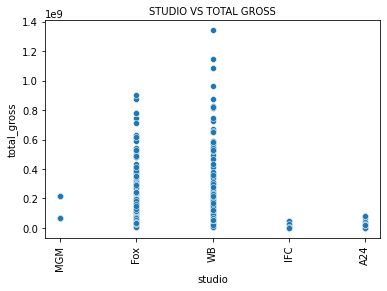

In [175]:
# which studio has the most successful movies produced with a high gross?
sns.scatterplot(x = 'studio', y = 'total_gross', data = film1)
plt.title('STUDIO VS TOTAL GROSS', fontsize = 10)
plt.xlabel('studio', fontsize = 10)
plt.ylabel('total_gross', fontsize = 10)
plt.xticks(rotation=90);
plt.show()

From this output we can tell in what order who will be the main competitors to Microsoft Movie Studio
in the movie industry empire starting with WB being the first.

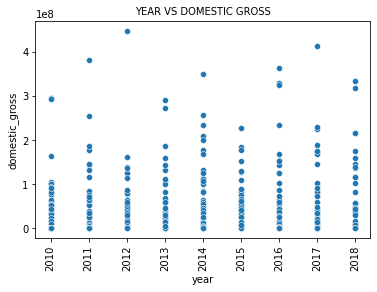

In [176]:
# does domestic gross increase or decrease over the years?
sns.scatterplot(x = 'year', y = 'domestic_gross', data = film1)
plt.title('YEAR VS DOMESTIC GROSS', fontsize = 10)
plt.xlabel('year', fontsize = 10)
plt.ylabel('domestic_gross', fontsize = 10)
plt.xticks(rotation=90);
plt.show()

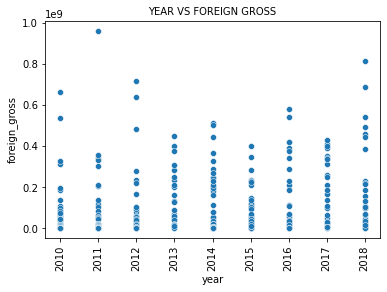

In [177]:
# does foreign gross increase or decrease over the years?
sns.scatterplot(x = 'year', y = 'foreign_gross', data = film1)
plt.title('YEAR VS FOREIGN GROSS', fontsize = 10)
plt.xlabel('year', fontsize = 10)
plt.ylabel('foreign_gross', fontsize = 10)
plt.xticks(rotation=90);
plt.show()

From the above two visuals of domestic_gross and foreign_gross, we can say that audiences from
within the nation and world_wide, both equally contribute to the success of a movie.

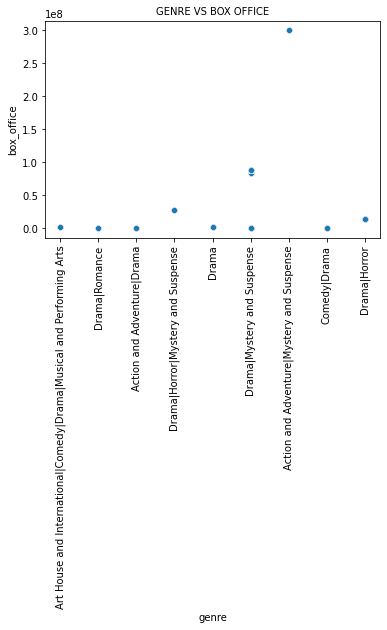

In [178]:
# which genre is trending in box_office?
sns.scatterplot(x = 'genre', y = 'box_office', data = film1)
plt.title('GENRE VS BOX OFFICE', fontsize = 10)
plt.xlabel('genre', fontsize = 10)
plt.ylabel('box_office', fontsize = 10)
plt.xticks(rotation=90);
plt.show()

Clearly, we can see that Action and Adventure|Mystery and Suspense trends more in box office.
With that info, the Microsoft Movie Studio can take action on which films to make or begin with 
inorder to be on top and make crazy profits at the same time.

Lets plot some graphs with the second merged table called film2:-

In [179]:
# Data Visualization packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [180]:
# lets get a view of what i am working with
film2.columns

Index(['movie_id', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres', 'averagerating', 'numvotes'],
      dtype='object')

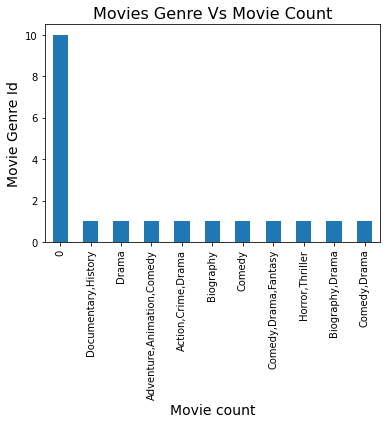

In [181]:
ax = film2['genres'].value_counts()[:20].plot(kind='bar')
ax.set_title('Movies Genre Vs Movie Count', fontsize=16)
ax.set_xlabel("Movie count",fontsize=14)
ax.set_ylabel("Movie Genre Id", fontsize=14);

We can say the unknown is leading while followed by comedy, drama, horror and thriller.

Lets plot some graphs with the table called tnmo_df:-

In [182]:
# Data Visualization packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [183]:
tnmo_df.columns

Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross'],
      dtype='object')

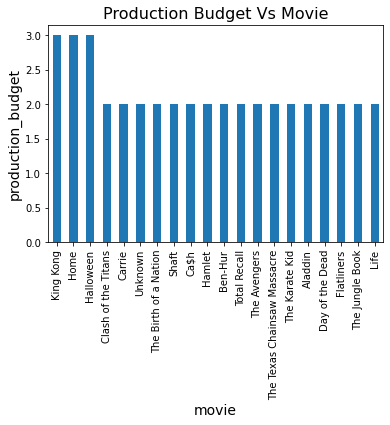

In [184]:
# correlation between movie vs production budget?
ax = tnmo_df['movie'].value_counts()[:20].plot(kind='bar')
ax.set_title('Production Budget Vs Movie', fontsize=16)
ax.set_xlabel("movie",fontsize=14)
ax.set_ylabel("production_budget", fontsize=14);

In [185]:
# which movie had the highest profit?
tnmo_df['profit']  = tnmo_df[ 'worldwide_gross'] - tnmo_df['production_budget']
tnmo_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747
...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,0,-7000
5778,79,"Apr 2, 1999",Following,6000,48482,240495,234495
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338,-3662
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0,-1400


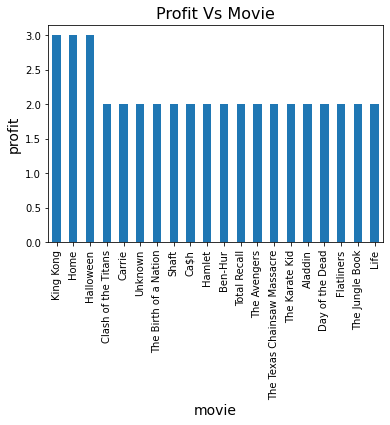

In [186]:
# plot the profit graph
ax = tnmo_df['movie'].value_counts()[:20].plot(kind='bar')
ax.set_title('Profit Vs Movie', fontsize=16)
ax.set_xlabel("movie",fontsize=14)
ax.set_ylabel("profit", fontsize=14);

From the above graphs between (movie vs production budget) and (movie vs profit), you will notice that movies with high a production budget end up being movies with the highest profits.  

# Conclusion

Most genres are rated R while the least are NR.
Drama|Mystery and Suspense genre made the highest total gross.
WB studio is the highest ranking studio making a high gross and definitely a major competitor to Microsoft Movie Studio.
Action and Adventure|Mystery and Suspense trends more in box office.
Clint Eastwood has the highest number of total gross as a director.
Brian Helgeland has the highest number of total gross  as a  script writer.
Movies with high a production budget end up being movies with the highest profits. 
